In [ ]:
#Basic DS imports
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
path = "/content/imdb-videogames.csv"

df = pd.read_csv(path)
df.head()

,Unnamed: 0,name,url,year,certificate,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
0,0,Spider-Man,https://www.imdb.com/title/tt5807780/?ref_=adv...,2018.0,T,9.2,"20,759","When a new villain threatens New York City, Pe...",True,True,False,False,False,True,False,False,False
1,1,Red Dead Redemption II,https://www.imdb.com/title/tt6161168/?ref_=adv...,2018.0,M,9.7,"35,703",Amidst the decline of the Wild West at the tur...,True,True,False,True,False,False,False,False,False
2,2,Grand Theft Auto V,https://www.imdb.com/title/tt2103188/?ref_=adv...,2013.0,M,9.5,"59,986",Three very different criminals team up for a s...,True,False,False,True,False,False,False,False,False
3,3,God of War,https://www.imdb.com/title/tt5838588/?ref_=adv...,2018.0,M,9.6,"26,118","After wiping out the gods of Mount Olympus, Kr...",True,True,False,False,False,False,False,False,False
4,4,Uncharted 4: A Thief's End,https://www.imdb.com/title/tt3334704/?ref_=adv...,2016.0,T,9.5,"28,722",Thrown back into the dangerous underworld he'd...,True,True,False,False,False,False,False,False,False


<Axes: xlabel='year', ylabel='rating'>

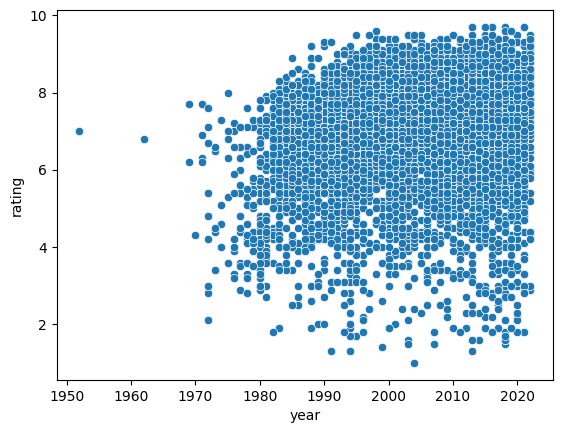

In [ ]:
sns.scatterplot(data=df, x="year", y="rating")

In [ ]:
df = df.drop_duplicates()
df = df.drop(columns=['Unnamed: 0', 'name', 'year', 'url', 'plot'])

df = df.dropna()

df['votes'] = df['votes'].str.replace(',', '').astype(int)
df = df.loc[df['votes']>=100,:]
df.reset_index(inplace=True, drop=True)
df

,certificate,rating,votes,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
0,T,9.2,20759,True,True,False,False,False,True,False,False,False
1,M,9.7,35703,True,True,False,True,False,False,False,False,False
2,M,9.5,59986,True,False,False,True,False,False,False,False,False
3,M,9.6,26118,True,True,False,False,False,False,False,False,False
4,T,9.5,28722,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3310,M,7.8,5029,True,False,False,False,False,False,True,True,False
3311,M,8.1,1357,False,False,False,False,False,False,False,False,True
3312,M,8.1,103,False,False,False,False,False,False,False,False,True
3313,M,4.9,197,False,False,False,False,False,False,False,False,False


END OF PART 2

In [ ]:
df['Action'] = df['Action'].map({True: 1, False: 0})
df['Adventure'] = df['Adventure'].map({True: 1, False: 0})
df['Comedy'] = df['Comedy'].map({True: 1, False: 0})
df['Crime'] = df['Crime'].map({True: 1, False: 0})
df['Family'] = df['Family'].map({True: 1, False: 0})
df['Fantasy'] = df['Fantasy'].map({True: 1, False: 0})
df['Mystery'] = df['Mystery'].map({True: 1, False: 0})
df['Sci-Fi'] = df['Sci-Fi'].map({True: 1, False: 0})
df['Thriller'] = df['Thriller'].map({True: 1, False: 0})

df

,certificate,rating,votes,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
0,T,9.2,20759,1,1,0,0,0,1,0,0,0
1,M,9.7,35703,1,1,0,1,0,0,0,0,0
2,M,9.5,59986,1,0,0,1,0,0,0,0,0
3,M,9.6,26118,1,1,0,0,0,0,0,0,0
4,T,9.5,28722,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3310,M,7.8,5029,1,0,0,0,0,0,1,1,0
3311,M,8.1,1357,0,0,0,0,0,0,0,0,1
3312,M,8.1,103,0,0,0,0,0,0,0,0,1
3313,M,4.9,197,0,0,0,0,0,0,0,0,0


In [ ]:
df = df.drop(columns='votes')
df

,certificate,rating,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
0,T,9.2,1,1,0,0,0,1,0,0,0
1,M,9.7,1,1,0,1,0,0,0,0,0
2,M,9.5,1,0,0,1,0,0,0,0,0
3,M,9.6,1,1,0,0,0,0,0,0,0
4,T,9.5,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3310,M,7.8,1,0,0,0,0,0,1,1,0
3311,M,8.1,0,0,0,0,0,0,0,0,1
3312,M,8.1,0,0,0,0,0,0,0,0,1
3313,M,4.9,0,0,0,0,0,0,0,0,0


In [ ]:
df['certificate'].value_counts()

M            1142
T            1081
E             586
E10+          323
K-A            66
Unrated        58
Not Rated      36
GA              8
AO              6
PG-13           3
MA-13           2
MA-17           2
TV-14           1
PG              1
Name: certificate, dtype: int64

In [ ]:
df = df.drop(df[df['certificate'] == 'K-A'].index)
df = df.drop(df[df['certificate'] == 'Unrated'].index)
df = df.drop(df[df['certificate'] == 'Not Rated'].index)
df = df.drop(df[df['certificate'] == 'GA'].index)
df = df.drop(df[df['certificate'] == 'AO'].index)
df = df.drop(df[df['certificate'] == 'PG-13'].index)
df = df.drop(df[df['certificate'] == 'MA-13'].index)
df = df.drop(df[df['certificate'] == 'MA-17'].index)
df = df.drop(df[df['certificate'] == 'TV-14'].index)
df = df.drop(df[df['certificate'] == 'PG'].index)
df.reset_index(inplace=True, drop=True)

df

,certificate,rating,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
0,T,9.2,1,1,0,0,0,1,0,0,0
1,M,9.7,1,1,0,1,0,0,0,0,0
2,M,9.5,1,0,0,1,0,0,0,0,0
3,M,9.6,1,1,0,0,0,0,0,0,0
4,T,9.5,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3127,M,7.8,1,0,0,0,0,0,1,1,0
3128,M,8.1,0,0,0,0,0,0,0,0,1
3129,M,8.1,0,0,0,0,0,0,0,0,1
3130,M,4.9,0,0,0,0,0,0,0,0,0


In [ ]:
df = pd.get_dummies(df)
df

,rating,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller,certificate_E,certificate_E10+,certificate_M,certificate_T
0,9.2,1,1,0,0,0,1,0,0,0,0,0,0,1
1,9.7,1,1,0,1,0,0,0,0,0,0,0,1,0
2,9.5,1,0,0,1,0,0,0,0,0,0,0,1,0
3,9.6,1,1,0,0,0,0,0,0,0,0,0,1,0
4,9.5,1,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20716,7.8,1,0,0,0,0,0,1,1,0,0,0,1,0
20717,8.1,0,0,0,0,0,0,0,0,1,0,0,1,0
20718,8.1,0,0,0,0,0,0,0,0,1,0,0,1,0
20725,4.9,0,0,0,0,0,0,0,0,0,0,0,1,0


<Axes: xlabel='Genre', ylabel='Number of Games'>

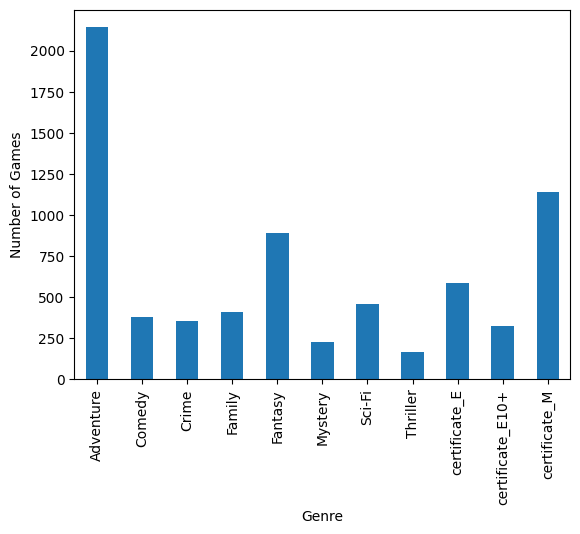

In [ ]:
df.iloc[:,2:-1].sum().plot(kind='bar', ylabel='Number of Games', xlabel='Genre')

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,rating,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller,certificate_E,certificate_E10+,certificate_M,certificate_T
rating,1.000000,-0.014190,0.113191,-0.022854,-0.001054,-0.112482,0.097069,0.066282,-0.033889,-0.046338,-0.055288,-0.065581,0.111439,-0.025518
Action,-0.014190,1.000000,0.058034,-0.118929,0.040347,-0.162226,-0.032060,-0.258077,0.022116,-0.086676,-0.108294,-0.027045,0.058518,0.046891
Adventure,0.113191,0.058034,1.000000,0.045899,-0.218322,0.010764,0.188603,-0.148973,-0.201422,-0.232944,0.088446,0.079249,-0.178371,0.057338
Comedy,-0.022854,-0.118929,0.045899,1.000000,-0.049281,-0.036297,-0.186418,-0.081064,-0.114536,-0.088057,0.015284,0.157455,-0.085817,-0.026380
Crime,-0.001054,0.040347,-0.218322,-0.049281,1.000000,-0.132590,-0.189918,0.032126,-0.116399,0.054113,-0.130212,-0.098060,0.225064,-0.058316
Family,-0.112482,-0.162226,0.010764,-0.036297,-0.132590,1.000000,-0.108094,-0.079100,-0.138716,-0.091978,0.431218,0.164573,-0.287686,-0.167754
Fantasy,0.097069,-0.032060,0.188603,-0.186418,-0.189918,-0.108094,1.000000,-0.138200,-0.176661,-0.149763,-0.010692,-0.048828,-0.094425,0.135605
Mystery,0.066282,-0.258077,-0.148973,-0.081064,0.032126,-0.079100,-0.138200,1.000000,-0.052751,0.059723,-0.074115,-0.062398,0.143863,-0.044936
Sci-Fi,-0.033889,0.022116,-0.201422,-0.114536,-0.116399,-0.138716,-0.176661,-0.052751,1.000000,0.038777,-0.107851,-0.068786,0.087127,0.044265
Thriller,-0.046338,-0.086676,-0.232944,-0.088057,0.054113,-0.091978,-0.149763,0.059723,0.038777,1.000000,-0.113859,-0.080477,0.183374,-0.040771


In [ ]:
#df.reset_index(drop=True, inplace=True)
#df = df.dropna()
X = df.drop(columns = 'rating')
y = df['rating']

features = [X.columns]

y = y.round()
y = y.astype(int)
X

,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller,certificate_E,certificate_E10+,certificate_M,certificate_T
0,1,1,0,0,0,1,0,0,0,0,0,0,1
1,1,1,0,1,0,0,0,0,0,0,0,1,0
2,1,0,0,1,0,0,0,0,0,0,0,1,0
3,1,1,0,0,0,0,0,0,0,0,0,1,0
4,1,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20716,1,0,0,0,0,0,1,1,0,0,0,1,0
20717,0,0,0,0,0,0,0,0,1,0,0,1,0
20718,0,0,0,0,0,0,0,0,1,0,0,1,0
20725,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaledDf = scaler.fit_transform(X)
# scaledDf = pd.DataFrame(data = scaledDf, columns = features)
# scaledDf

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X = pca.fit(X).transform(X)

pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.889036,-0.467951,-0.498248,0.207847,-0.055857,-0.095498,0.020215,0.004035,-0.040570,-0.015896,-0.011820,0.052400,-1.110223e-16
1,0.749794,-0.054658,-0.360233,-0.453815,-0.026173,-0.496628,-0.335287,-0.219137,0.512511,-0.214757,-0.062826,0.028795,-5.273559e-16
2,1.084878,-0.299591,0.195391,0.123257,-0.060202,-0.681800,-0.034022,-0.062775,0.387172,-0.169733,-0.085273,-0.101970,-3.053113e-16
3,0.582038,0.055617,-0.437567,-0.423542,-0.083344,0.015317,-0.156916,-0.100116,-0.217322,-0.017346,0.048251,-0.210987,-1.665335e-16
4,-0.624456,-0.404705,0.112450,-0.426911,-0.085104,-0.090062,-0.208540,-0.135426,-0.144289,0.069085,0.076787,-0.174833,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3127,1.098955,-0.396874,0.368409,0.215742,-0.230283,0.622497,0.009559,-0.073059,-0.148676,0.459368,-0.644635,0.371251,-2.220446e-16
3128,0.995751,-0.112555,0.311441,0.487979,0.646227,0.204251,-0.205422,-0.115692,-0.260458,-0.013072,0.931628,0.025392,1.054712e-15
3129,0.995751,-0.112555,0.311441,0.487979,0.646227,0.204251,-0.205422,-0.115692,-0.260458,-0.013072,0.931628,0.025392,1.054712e-15
3130,0.904347,-0.049938,0.245861,0.441778,0.602754,0.193791,-0.149584,-0.048330,-0.140637,-0.087729,0.169015,-0.582986,1.110223e-15


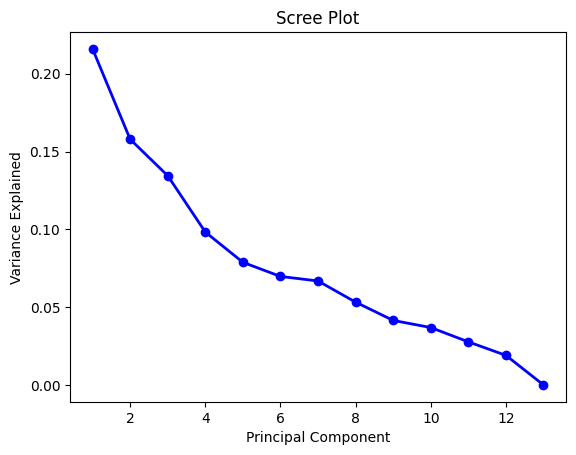

In [ ]:
import matplotlib.pyplot as plt
PC_values = np.arange(pca.n_components_)+1

plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')

plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

<Axes: xlabel='First Principal Component', ylabel='Second Principal Component'>

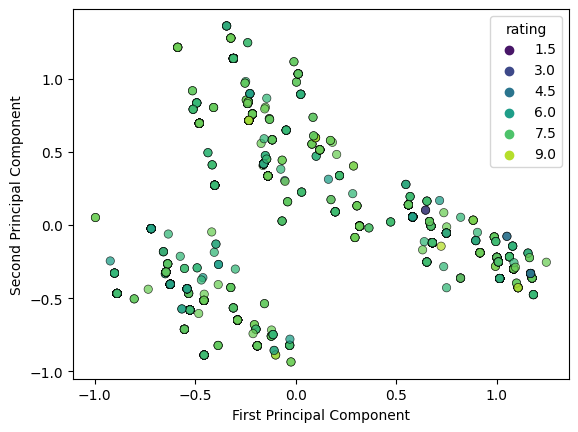

In [ ]:
X = pd.DataFrame(X[:,0:2], columns = ['First Principal Component', 'Second Principal Component'])
sns.scatterplot(x = X['First Principal Component'], y = X['Second Principal Component'], hue = y, alpha = .75, edgecolor="black", palette = 'viridis')

In [ ]:
########Do this before or after below code window.  Look and see which one is for testing accuracy of the model and which one is for actuall model training proability

#Code for splitting the data

#Use below to find accuracy for each model (?? Idk if this makes sense ?? )
##Train all models on split data
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

knn2 = KNeighborsClassifier(n_neighbors= 2)
knn5 = KNeighborsClassifier(n_neighbors= 5)
knn8 = KNeighborsClassifier(n_neighbors= 8)
tree = DecisionTreeClassifier()
tree3 = DecisionTreeClassifier(max_depth= 3)
tree5 = DecisionTreeClassifier(max_depth= 5)
tree8 = DecisionTreeClassifier(max_depth= 8)
log_reg = LogisticRegression()
svc = SVC()
classifiers = [knn2, knn5, knn8, tree, tree3, tree5, tree8, log_reg, svc]

accuracy_dict = {}

for classifier in classifiers:
  accuracy_dict[classifier] = []

print(accuracy_dict)

# np.ones((25, 1)), np.hstack(([0] * 20, [1] * 5))
skf = StratifiedKFold(n_splits=2)
for train_index, test_index in skf.split(X, y):

  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  for model in classifiers:
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate and store the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_dict[model].append(accuracy)


# average_accuracy = sum(accuracy_scores) / n_splits
# print(f'Average Accuracy: {average_accuracy}')
print(accuracy_dict)

###EX after training. knn2.predict_proba

{KNeighborsClassifier(n_neighbors=2): [], KNeighborsClassifier(): [], KNeighborsClassifier(n_neighbors=8): [], DecisionTreeClassifier(): [], DecisionTreeClassifier(max_depth=3): [], DecisionTreeClassifier(max_depth=5): [], DecisionTreeClassifier(max_depth=8): [], LogisticRegression(): [], SVC(): []}
{KNeighborsClassifier(n_neighbors=2): [0.23754789272030652, 0.3173690932311622], KNeighborsClassifier(): [0.37484035759897827, 0.3326947637292465], KNeighborsClassifier(n_neighbors=8): [0.42337164750957856, 0.3448275862068966], DecisionTreeClassifier(): [0.4342273307790549, 0.429757343550447], DecisionTreeClassifier(max_depth=3): [0.4501915708812261, 0.4482758620689655], DecisionTreeClassifier(max_depth=5): [0.4482758620689655, 0.44189016602809705], DecisionTreeClassifier(max_depth=8): [0.4450830140485313, 0.4342273307790549], LogisticRegression(): [0.45721583652618136, 0.45721583652618136], SVC(): [0.45721583652618136, 0.45721583652618136]}


In [ ]:
max_acc = -1
max_model = 0
for c in accuracy_dict:
  print(c)
  acc = sum(accuracy_dict[c])/len(accuracy_dict[c])
  print(acc)
  if max_acc < acc:
    max_acc = acc
    max_model = c

print('Max model is {} with accuracy of {}'.format(max_model, max_acc))

KNeighborsClassifier(n_neighbors=2)
0.2774584929757343
KNeighborsClassifier()
0.3537675606641124
KNeighborsClassifier(n_neighbors=8)
0.38409961685823757
DecisionTreeClassifier()
0.43199233716475094
DecisionTreeClassifier(max_depth=3)
0.4492337164750958
DecisionTreeClassifier(max_depth=5)
0.4450830140485313
DecisionTreeClassifier(max_depth=8)
0.4396551724137931
LogisticRegression()
0.45721583652618136
SVC()
0.45721583652618136
Max model is LogisticRegression() with accuracy of 0.45721583652618136
